## ECON HW 3
### Ellen Wu

In [14]:
# Importing the libraries 
# Import libraries
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from scipy.spatial.distance import mahalanobis
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.ticker as ticker
import matplotlib
import seaborn as sns
from tabulate import tabulate
from statsmodels.formula.api import ols
from causalinference import CausalModel
from sklearn.neighbors import NearestNeighbors
from IPython.display import Markdown, display
import warnings
warnings.simplefilter('ignore')

1. Present a bar graph showing the proportion of states with a change in their cigarette tax in each year from 1970 to 1985.

In [11]:
# Load data
df = pd.read_csv("/Users/ellenwu/homework3_attempt1-/data/output/TaxBurden_Data.csv")

# Focus only on years 1970-1985
df = df[(df['Year'] >= 1970) & (df['Year'] <= 1985)]

# Sort data just in case
df = df.sort_values(by=['state', 'Year'])

In [12]:
df['tax_change'] = df.groupby('state')['tax_state'].diff().notnull() & (df.groupby('state')['tax_state'].diff() != 0)

In [13]:
# Total number of states per year
states_per_year = df.groupby('Year')['state'].nunique()

# Number of states with a tax change each year
states_with_change_per_year = df[df['tax_change']].groupby('Year')['state'].nunique()

# Proportion of states with a tax change
proportion_with_change = (states_with_change_per_year / states_per_year).fillna(0).reset_index()
proportion_with_change.columns = ['Year', 'Proportion']

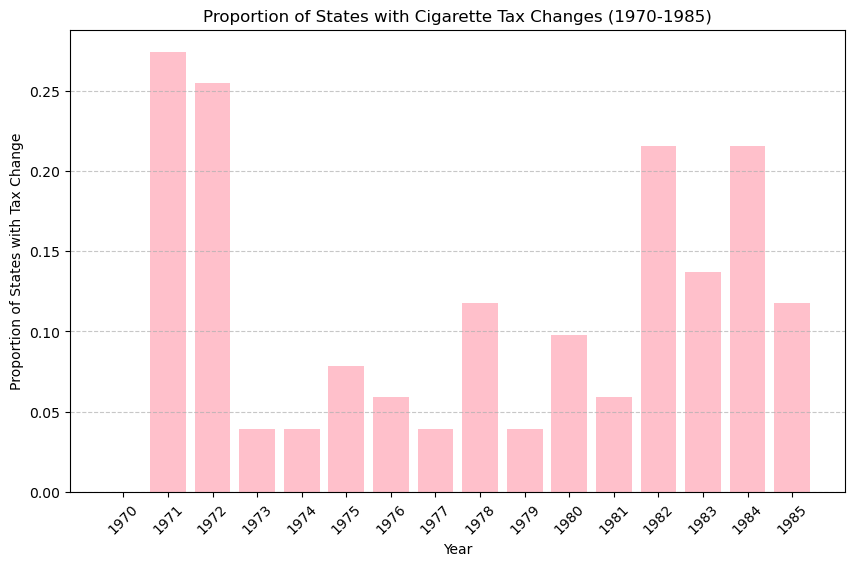

In [7]:
plt.figure(figsize=(10,6))
plt.bar(proportion_with_change['Year'], proportion_with_change['Proportion'], color='pink')
plt.title('Proportion of States with Cigarette Tax Changes (1970-1985)')
plt.xlabel('Year')
plt.ylabel('Proportion of States with Tax Change')
plt.xticks(proportion_with_change['Year'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

2. Plot on a single graph the average tax (in 2012 dollars) on cigarettes and the average price of a pack of cigarettes from 1970 to 2018.

In [16]:
# Filter for years 1970 to 2018
df = df[(df['Year'] >= 1970) & (df['Year'] <= 2018)]

# Use CPI to adjust to 2012 dollars
# Assuming 2012 CPI = 230 (You should check the exact CPI value for 2012 from your dataset if available)
df['cost_per_pack_2012'] = df['cost_per_pack'] * (230 / df['index'])
df['tax_state_2012'] = df['tax_state'] * (230 / df['index'])

# Group by year and compute average across all states
annual_avg = df.groupby('Year').agg({
    'cost_per_pack_2012': 'mean',
    'tax_state_2012': 'mean'
}).reset_index()

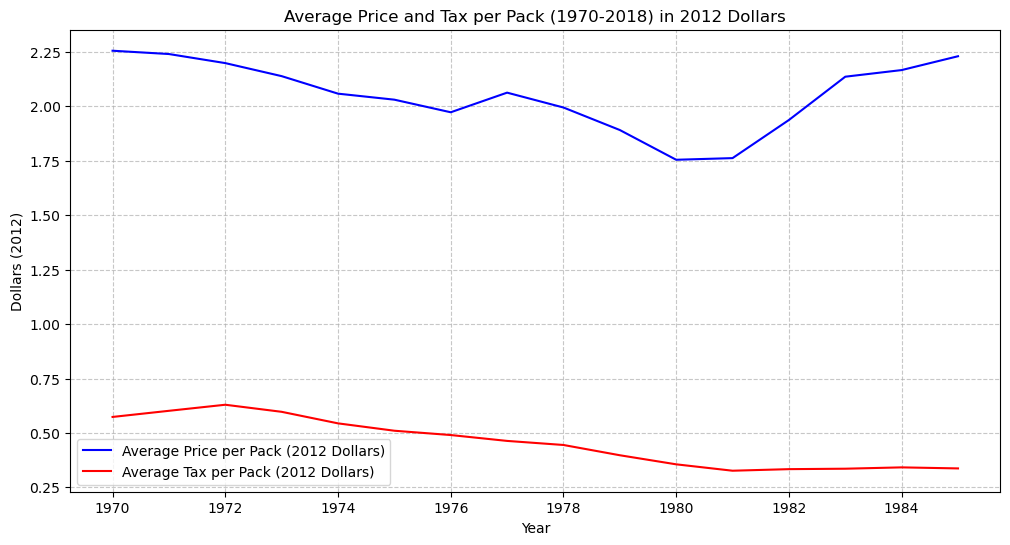

In [17]:
# Plot
plt.figure(figsize=(12, 6))

plt.plot(annual_avg['Year'], annual_avg['cost_per_pack_2012'], label='Average Price per Pack (2012 Dollars)', color='blue')
plt.plot(annual_avg['Year'], annual_avg['tax_state_2012'], label='Average Tax per Pack (2012 Dollars)', color='red')

plt.title('Average Price and Tax per Pack (1970-2018) in 2012 Dollars')
plt.xlabel('Year')
plt.ylabel('Dollars (2012)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()